# Analýza dát

In [20]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [3]:
df_graduates = pd.read_csv('../data/preprocessed/cvtisr/graduates.csv', sep=';')
df_teachers_summary = pd.read_csv('../data/preprocessed/cvtisr/teachers_summary.csv', sep=';')
df_teachers_degrees = pd.read_csv('../data/preprocessed/cvtisr/teachers_degrees.csv', sep=';')

In [4]:
display(df_teachers_summary)

,univerzita,rok,počet full-time zamestnancov,počet part-time zamestnancov
0,AU,2009,90,26
1,AU,2010,95,21
2,AU,2011,105,21
3,AU,2012,105,20
4,AU,2013,106,29
...,...,...,...,...
275,ŽU,2018,558,51
276,ŽU,2019,559,37
277,ŽU,2020,545,39
278,ŽU,2021,518,44


In [5]:
display(df_teachers_degrees)

,univerzita,rok,typ učiteľa,úväzok,DrSc.,"CSc., PhD.",iný/žiadny titul,spolu
0,AU,2009,asistent,full-time,0,0,10,10
1,AU,2009,asistent,part-time,0,0,3,3
2,AU,2009,docent,full-time,0,4,9,13
3,AU,2009,docent,part-time,0,1,2,3
4,AU,2009,hosťujúci profesor,full-time,0,0,0,0
...,...,...,...,...,...,...,...,...
3343,ŽU,2022,lektor,part-time,0,0,3,3
3344,ŽU,2022,odborný asistent,full-time,0,226,3,229
3345,ŽU,2022,odborný asistent,part-time,0,32,0,32
3346,ŽU,2022,profesor,full-time,2,86,0,88


## Počty učiteľov

In [8]:
typy = df_teachers_degrees["typ učiteľa"].unique()
roky = df_teachers_degrees["rok"].unique()

pocty = {}
for rok in roky:
    temp = df_teachers_degrees[df_teachers_degrees["rok"] == rok]
    counts = temp.groupby("typ učiteľa")["spolu"].sum()
    for typ in typy:
        if rok not in pocty:
            pocty[rok] = dict()
        pocty[rok][typ] = counts[typ]
        
display(pocty)
        

{2009: {'asistent': 437,
  'docent': 2237,
  'hosťujúci profesor': 0,
  'lektor': 154,
  'odborný asistent': 7022,
  'profesor': 1531},
 2010: {'asistent': 432,
  'docent': 2245,
  'hosťujúci profesor': 0,
  'lektor': 149,
  'odborný asistent': 6751,
  'profesor': 1501},
 2011: {'asistent': 412,
  'docent': 2285,
  'hosťujúci profesor': 0,
  'lektor': 160,
  'odborný asistent': 6498,
  'profesor': 1496},
 2012: {'asistent': 405,
  'docent': 2357,
  'hosťujúci profesor': 0,
  'lektor': 160,
  'odborný asistent': 6394,
  'profesor': 1512},
 2013: {'asistent': 398,
  'docent': 2385,
  'hosťujúci profesor': 0,
  'lektor': 163,
  'odborný asistent': 6393,
  'profesor': 1533},
 2014: {'asistent': 368,
  'docent': 2528,
  'hosťujúci profesor': 0,
  'lektor': 206,
  'odborný asistent': 6108,
  'profesor': 1570},
 2015: {'asistent': 361,
  'docent': 2521,
  'hosťujúci profesor': 0,
  'lektor': 237,
  'odborný asistent': 5953,
  'profesor': 1522},
 2016: {'asistent': 366,
  'docent': 2502,
  'ho

In [17]:
df = pd.DataFrame(pocty).transpose()
display(df)

,asistent,docent,hosťujúci profesor,lektor,odborný asistent,profesor
2009,437,2237,0,154,7022,1531
2010,432,2245,0,149,6751,1501
2011,412,2285,0,160,6498,1496
2012,405,2357,0,160,6394,1512
2013,398,2385,0,163,6393,1533
2014,368,2528,0,206,6108,1570
2015,361,2521,0,237,5953,1522
2016,366,2502,0,234,5860,1511
2017,394,2540,0,228,5784,1458
2018,408,2538,0,229,5838,1440


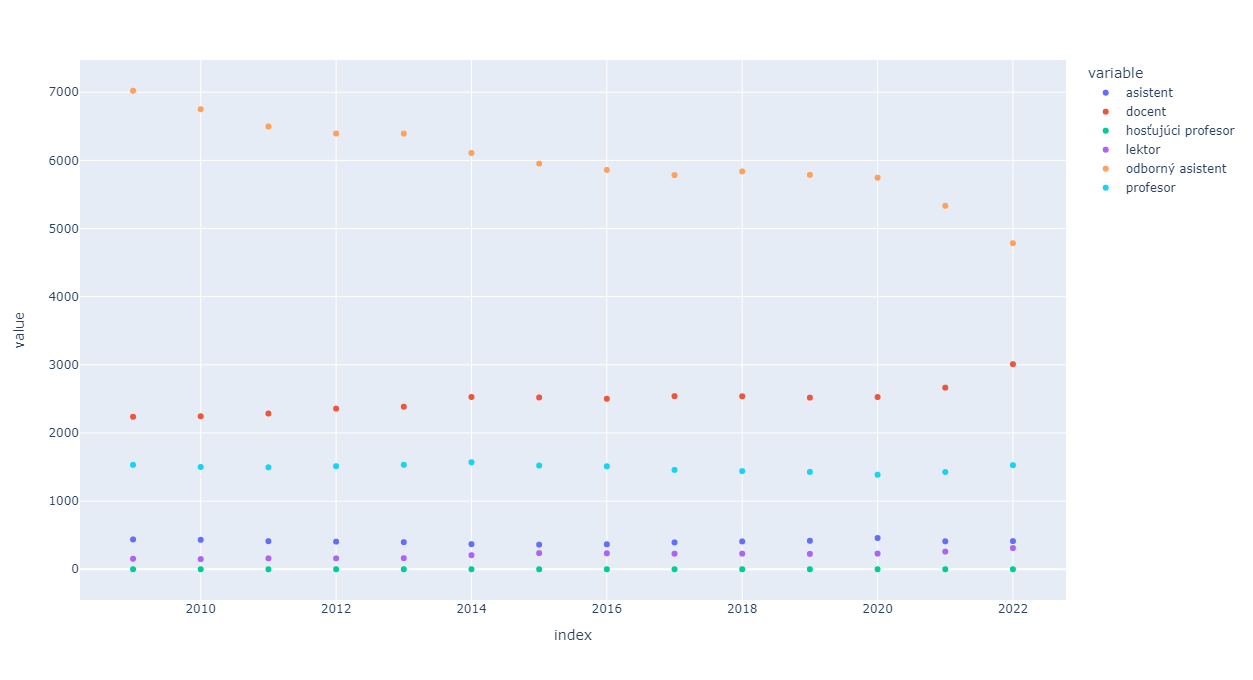

In [26]:
px.scatter(df, width=1100, height=680)